# ORB
- ORB, like BRISK, is an extension to FAST keypoint detector.
- Like BRISK, it utilizes an image pyramid to account for multi-scale keypoints; however, ORB adds rotation invariance as well.
- Refer [paper](https://gurus.pyimagesearch.com/wp-content/uploads/2015/06/rublee_2011.pdf)
- Suitable for real-time applications.
- Used to detect corners in images

## How it works:
- Steps:
    - Compute FAST keypoint detector across multiple scales of image, like in BRISK. A circular neighborhood of 16 pixels is utilized, where 9 contiguous pixels must be all smaller or larger than the center pixel. If this contiguous case holds, then the center pixel is marked as a keypoint
    - Rank the keypoints. All keypoints over all scales of image pyramid are ranked and sorted according to their Harris keypoint score. Max n=500 keypoints are kept and rest are discarded.
    - Third step is rotation invariance. Region surrounding the center of keypoint is examined. Process of measuring orientation of keypoint is called *intensity centroid*.
$$
m_{p,q} = \sum_{x,y}x^p y^q I(x,y)
$$
- This equation is then used to obtain centroid of image patch
$$
C = (m_{10}/m_{00}, m_{01}/m_{00})
$$
- Using the intensity controid, the keypoint can be rotated according to its dominant axis, ensuring that we obtain a canonical representation of the area surrounding the keypoint
$$
\theta = arctan2(m_{01}, m_{10})
$$
- Performing the rotation ensures that, if same keypoint appears in an image but was rotated by some angle $\theta$, the same keypoint could not only be detected  but also described in the same way.

In [1]:
import sys
sys.path.append("../../")

In [2]:
import numpy as np
import cv2
import imutils
from cv_imshow import display_image, create_subplot

In [4]:
args = {
    "image":"../../images/fast_book_cover.png",
    "pen":"../../images/keypoint_detect/pen.jpg"
}

In [5]:
def keypoint_detect(imagePath):
    #load and convert image
    image = cv2.imread(imagePath)
    orig = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #detetc orb keypoints
    detector = cv2.ORB_create()
    kps = detector.detect(gray, None)
    
    print("# of keypoints: {}".format(len(kps)))
    
    #loop over the keypoints and draw them
    for kp in kps:
        r = int(0.5*kp.size)
        (x,y) = np.int0(kp.pt)
        cv2.circle(image, (x,y), r, (0,255,255), 2)
    
    display_image("Images", np.hstack([orig, image]))

# of keypoints: 500


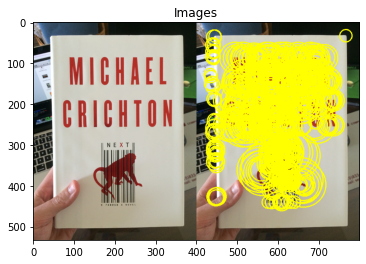

In [6]:
keypoint_detect(args["image"])

# of keypoints: 448


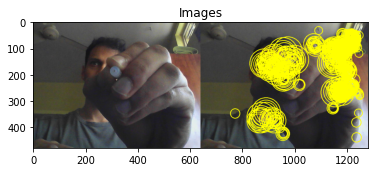

In [7]:
keypoint_detect(args["pen"])